Visualising Dataset

In [1]:
#from tensorflow import keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Spiral (Healthy)

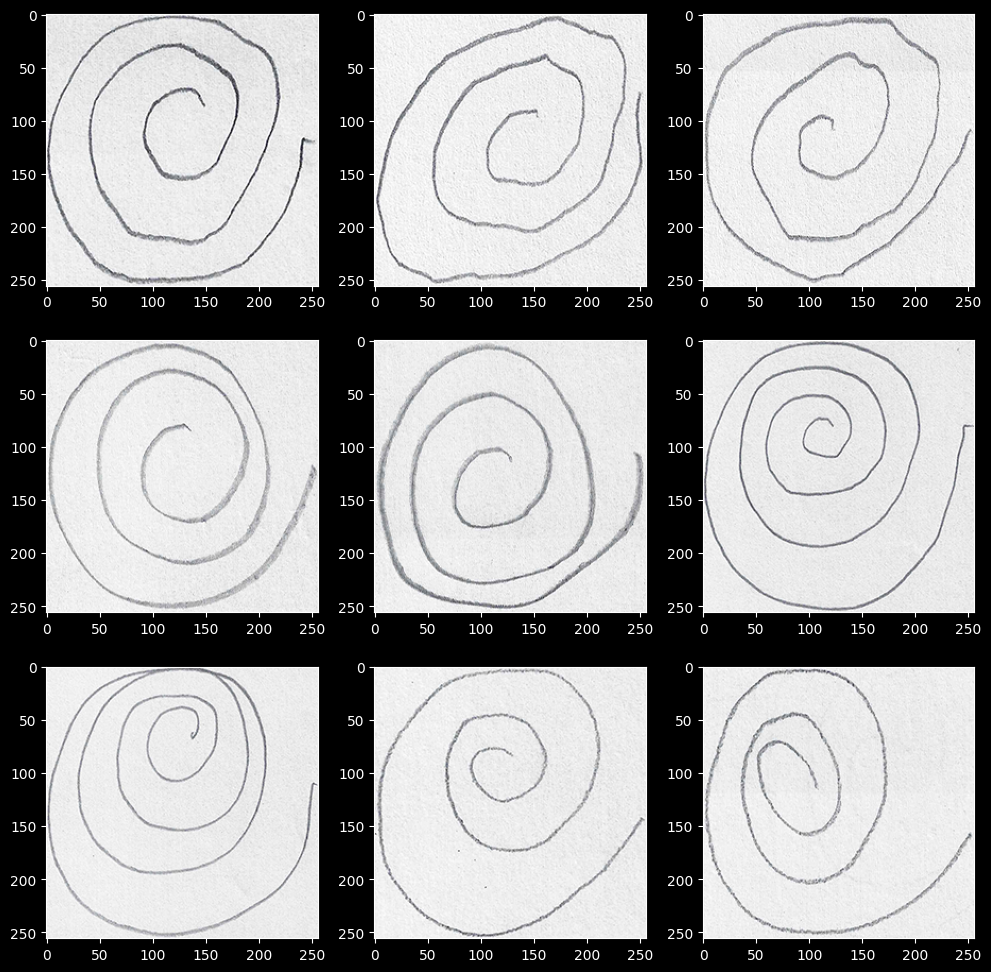

In [2]:
import PIL.Image
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/healthy/"+ os.listdir("drawings/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

# Spiral (Parkinson)

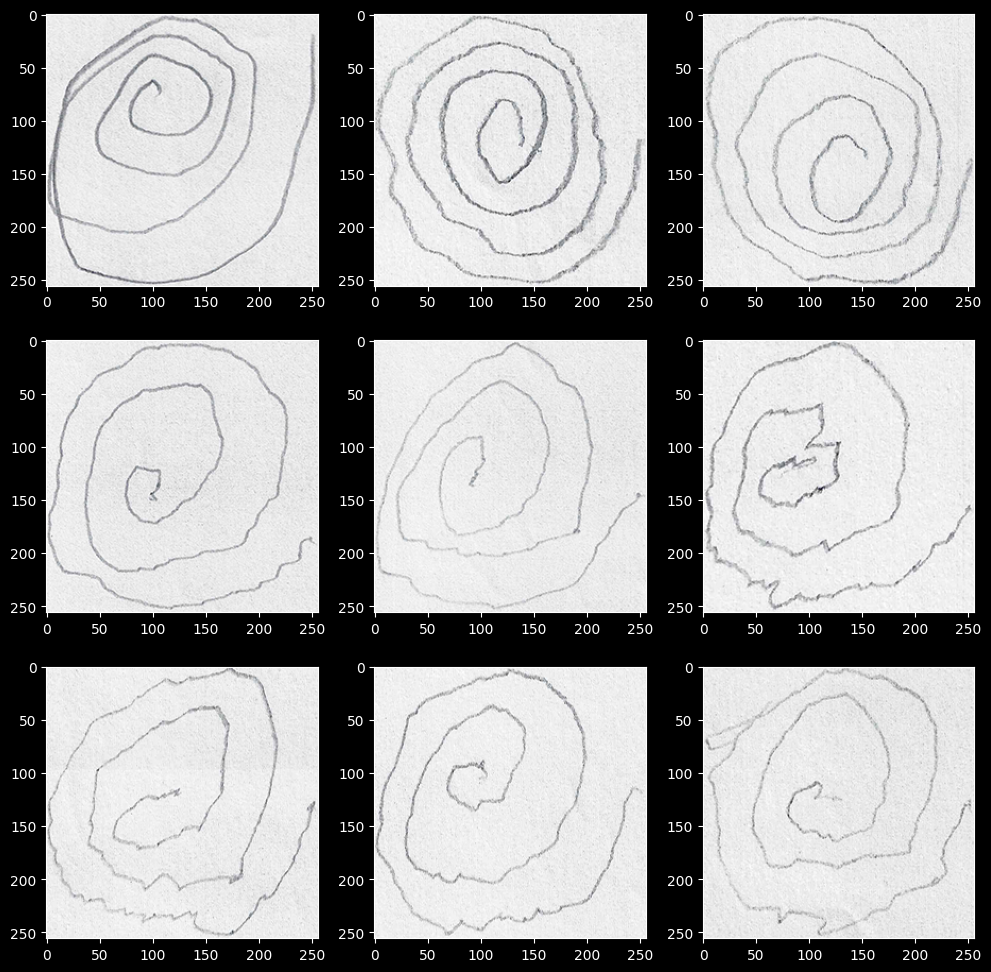

In [4]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/spiral/training/parkinson/"+os.listdir("drawings/spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# Wave (Healthy)

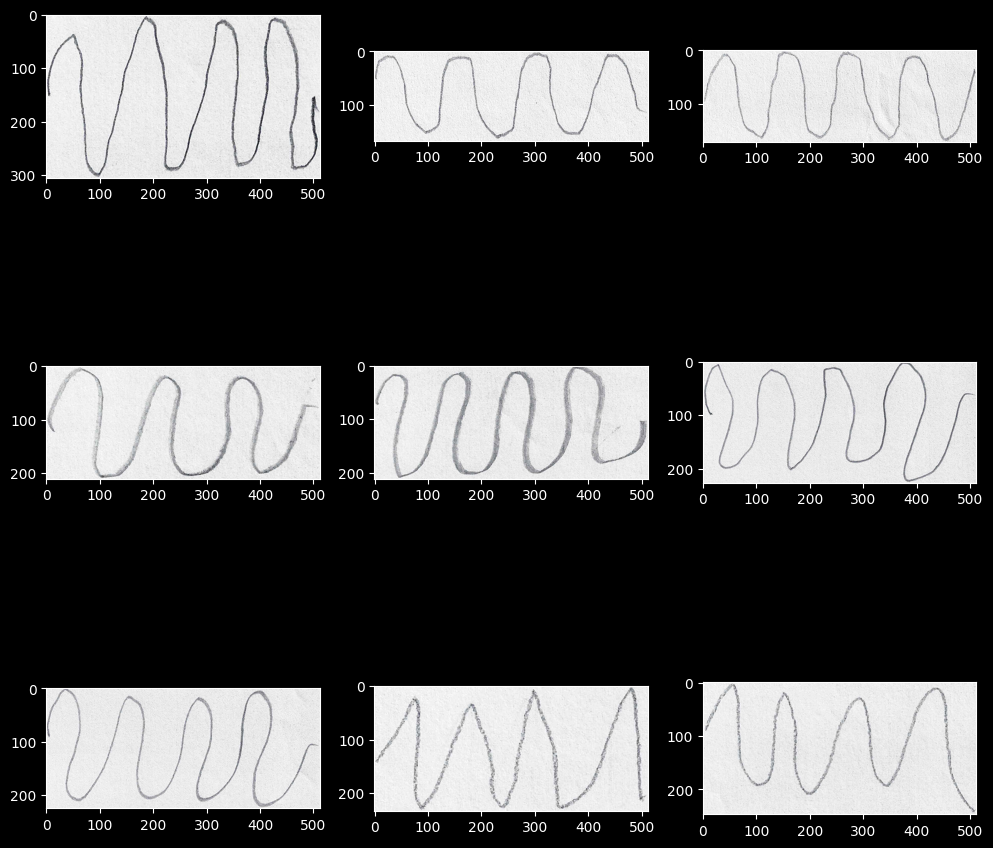

In [3]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/healthy/"+os.listdir("drawings/wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

# Wave (Parkinson)

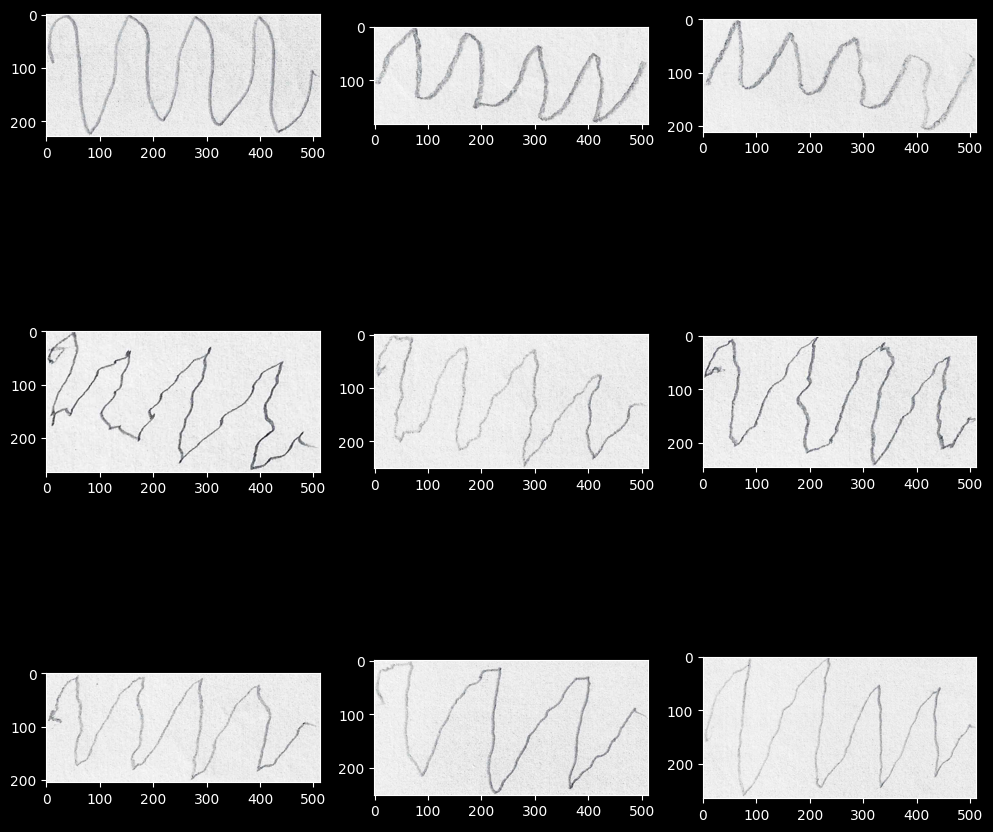

In [4]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("drawings/wave/training/parkinson/"+
                  os.listdir("drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

Importing CNN Layers

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Building Classifier

In [6]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

Image Data Generation

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
spiral_train_generator = train_datagen.flow_from_directory('drawings/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   classes=['healthy', 'parkinson'])


spiral_test_generator = test_datagen.flow_from_directory('drawings/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   classes=['healthy', 'parkinson'])
print(spiral_train_generator.class_indices)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
{'healthy': 0, 'parkinson': 1}


In [10]:
wave_train_generator = train_datagen.flow_from_directory('drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   classes=['healthy', 'parkinson'])

wave_test_generator = test_datagen.flow_from_directory('drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   classes=['healthy', 'parkinson'])

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Fitting The Model with Data

In [11]:
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
history = classifier.fit(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=48,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)


Epoch 1/48
2/2 [==============================] - 4s 935ms/step - loss: 4.5677 - accuracy: 0.5000 - lr: 0.0010
Epoch 2/48
2/2 [==============================] - 1s 594ms/step - loss: 2.2280 - accuracy: 0.4500 - lr: 0.0010
Epoch 3/48
2/2 [==============================] - 1s 610ms/step - loss: 1.2951 - accuracy: 0.5000 - lr: 0.0010
Epoch 4/48
2/2 [==============================] - 1s 463ms/step - loss: 0.7649 - accuracy: 0.5000 - lr: 0.0010
Epoch 5/48
2/2 [==============================] - 1s 200ms/step - loss: 0.6883 - accuracy: 0.5500 - lr: 0.0010
Epoch 6/48
2/2 [==============================] - 1s 588ms/step - loss: 0.7012 - accuracy: 0.4750 - lr: 0.0010
Epoch 7/48
2/2 [==============================] - 1s 539ms/step - loss: 0.6967 - accuracy: 0.4219 - lr: 0.0010
Epoch 8/48
2/2 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.4844Restoring model weights from the end of the best epoch: 5.

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949

Plotting Accuracy and Loss

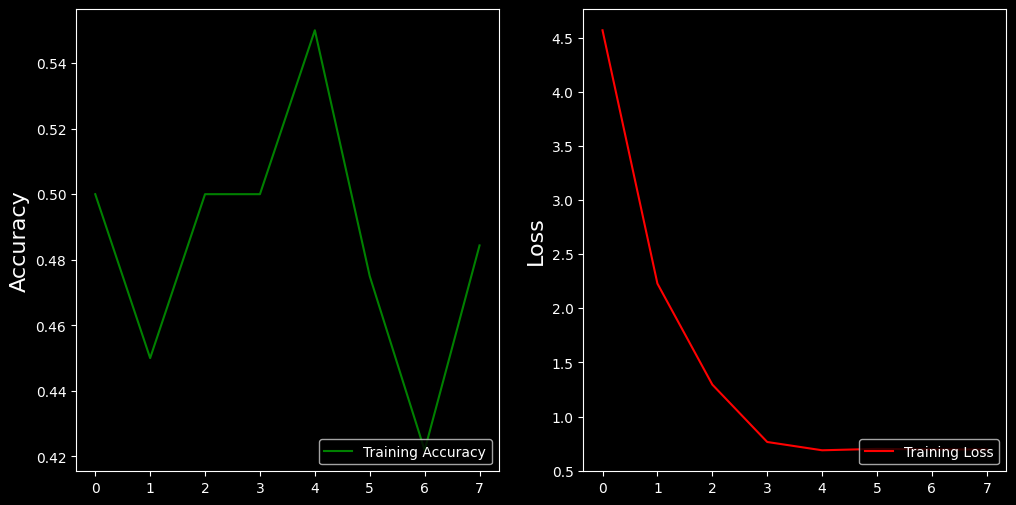

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()

In [14]:

# Save the CNN model
classifier.save('cnn_model.h5')


In [17]:
from keras.models import load_model

# Load the saved CNN model
loaded_model = load_model('cnn_model.h5')
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [16]:
test=loaded_model.predict(spiral_test_generator)
print(test)

1/1 [==============================] - 0s 498ms/step
[[0.456573  ]
 [0.45510483]
 [0.45415083]
 [0.4572531 ]
 [0.45508298]
 [0.45557052]
 [0.45420483]
 [0.4552875 ]
 [0.45737547]
 [0.45501474]
 [0.45270422]
 [0.45712486]
 [0.45276988]
 [0.4572536 ]
 [0.45504388]
 [0.45485365]
 [0.454628  ]
 [0.45263788]
 [0.45467907]
 [0.45626426]
 [0.457079  ]
 [0.45381975]
 [0.45462695]
 [0.45444217]
 [0.45588064]
 [0.45485452]
 [0.45558846]
 [0.45516515]
 [0.45620635]
 [0.45605344]]


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtain the predicted labels for training and test data
y_train_pred = np.argmax(classifier.predict(spiral_train_generator), axis=1)
y_test_pred = np.argmax(classifier.predict(spiral_test_generator), axis=1)

# Obtain the true labels for training and test data
y_train_true = spiral_train_generator.classes
y_test_true = spiral_test_generator.classes

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred, average='macro')
train_recall = recall_score(y_train_true, y_train_pred, average='macro')
train_f1_score = f1_score(y_train_true, y_train_pred, average='macro')

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred, average='macro')
test_recall = recall_score(y_test_true, y_test_pred, average='macro')
test_f1_score = f1_score(y_test_true, y_test_pred, average='macro')

# Print the evaluation metrics
print("Training Data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)
print()
print("Test Data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)


1/1 [==============================] - 0s 241ms/step
Training Data:
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1-score: 0.3333333333333333

Test Data:
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1-score: 0.3333333333333333


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
